### Import the libraries 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading the image and displaying the original 

In [3]:
img = cv2.imread("Imges/Typical_New_Zealand_scenic_walk_view.jpg")   
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


We begin by loading the original landscape image using OpenCV and converting it from BGR to RGB for proper color display with Matplotlib. This allows us to visualize the unprocessed image as a reference before enhancement

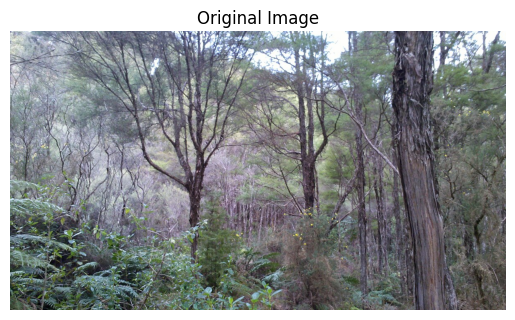

In [12]:
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Contrast Enhancement


To improve brightness and contrast without altering the natural colors, we convert the image into the HSV color space and apply histogram equalization only on the Value (V) channel. This stretches the intensity distribution, making details in shadows and highlights more visible.

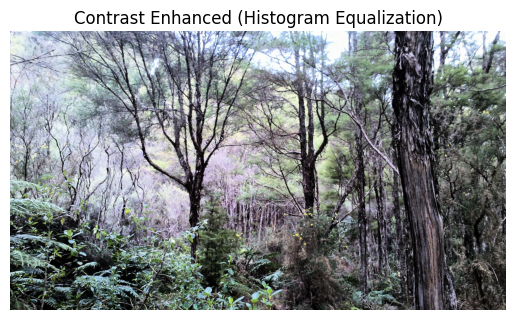

In [13]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)


hsv_eq = cv2.merge((h, s, v_eq))
img_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)


plt.imshow(img_eq)
plt.title("Contrast Enhanced (Histogram Equalization)")
plt.axis("off")
plt.show()


### Saturation Enhancement


We boost the Saturation (S) channel of the HSV image by multiplying it with a factor. This makes colors appear richer and more vivid while preserving the original hues. Clipping is handled to prevent values from exceeding 255, avoiding unnatural artifacts.

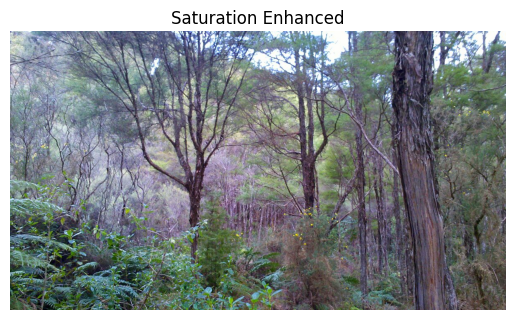

In [14]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)

factor = 1.5
hsv[:, :, 1] = np.clip(hsv[:, :, 1] * factor, 0, 255)


hsv = np.uint8(hsv)
img_sat = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


plt.imshow(img_sat)
plt.title("Saturation Enhanced")
plt.axis("off")
plt.show()


### Compare All Versions



Finally, we display the original, contrast-enhanced, and saturation-enhanced images side by side. This comparison clearly shows the effect of each enhancement method, helping us evaluate which technique—or a combination—best highlights the scenery.

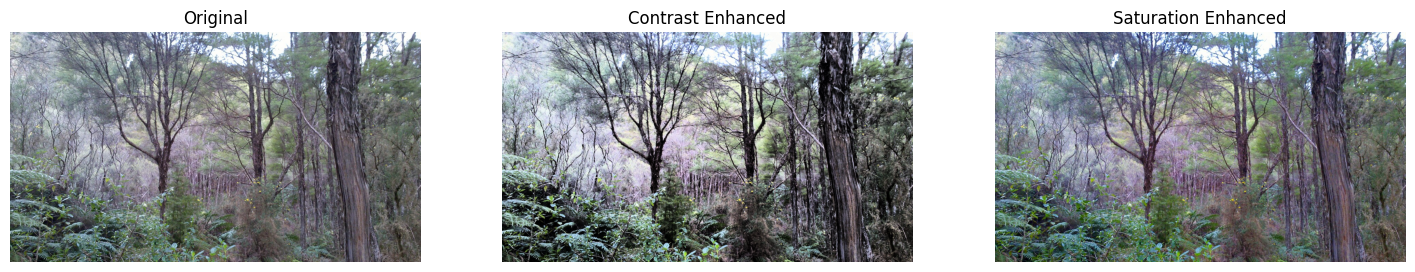

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(img_eq)
axs[1].set_title("Contrast Enhanced")
axs[1].axis("off")

axs[2].imshow(img_sat)
axs[2].set_title("Saturation Enhanced")
axs[2].axis("off")

plt.show()
